<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

In [4]:
import numpy as np
from matplotlib import pyplot as plt

# What to expect in this chapter

- object oriented interface

# 1 Some nomenclature

let’s distinguish between a Matplotlib figure and an axis.

A figure is simple; it is the full canvas you use to draw stuff on. An axis is the individual mathematical axes we use for plotting. So, one figure can have multiple axes, as shown below, where we have a (single) figure with four axes.


# 2 Comparing the two ‘dialects’

Let's create the same plot using both pyplot and OO ‘dialects’ so that you can see how the latter works.

First, let’s generate some data to plot.

In [5]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

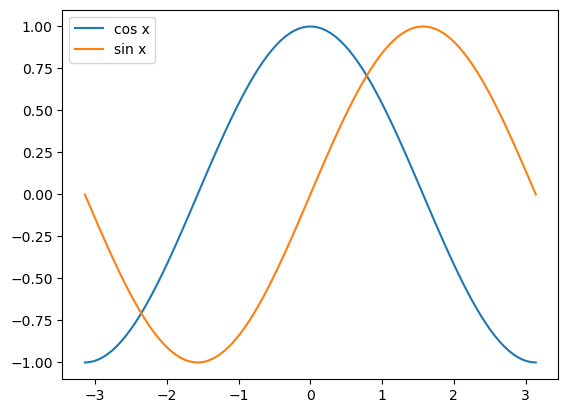

In [6]:
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

### OO Interface

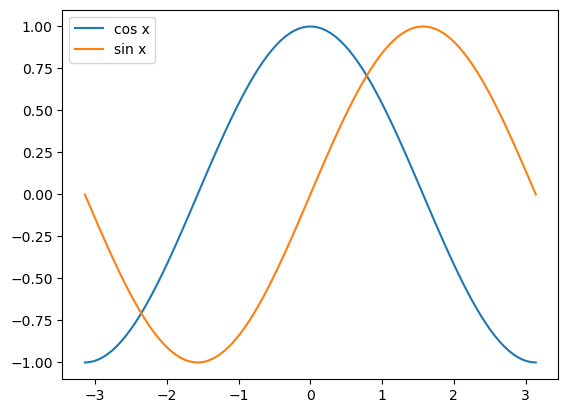

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

For the OO interface, we have to start by using subplots() to ask Matplotlib to create a figure and an axis. Matplotlib obliges and gives us a figure (fig) and an axis (ax).

- can name the variables fig and ax anything
- In this example, we need only one column and one row. But, if we want, we can ask for a grid like in the plot right at the top.

Yes, the OO looks more complicated than the pyplot version. But, it offers so much freedom that it is worth learning it for more demanding, complex plots. You will see this soon.



# 3 What is OO ax, really?

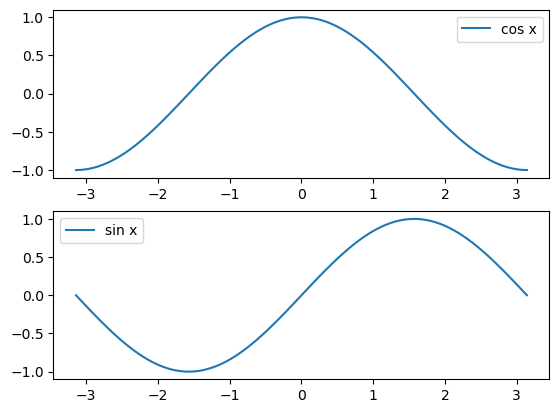

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

To get the above plot, we must ask for two rows (nrows=2) and one column (ncols=1). We do this by using subplots()

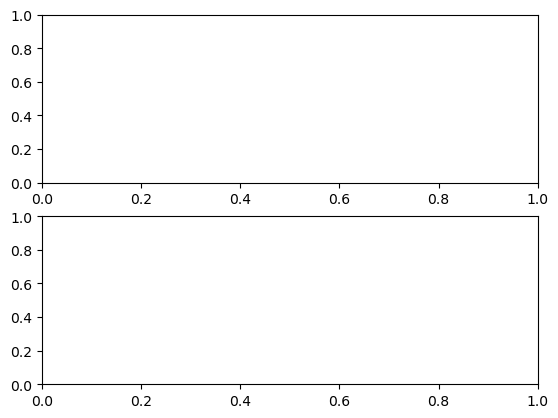

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=2)

### What is ax?

In [10]:
type(ax)

numpy.ndarray

ax is a numpy array!

### What size is ax?

In [11]:
ax.shape

(2,)

2 things inside of ax!

### What is contained in ax?

In [12]:
type(ax[0])

matplotlib.axes._axes.Axes

This is a Matplotlib.axis

# 4 A complete OO example

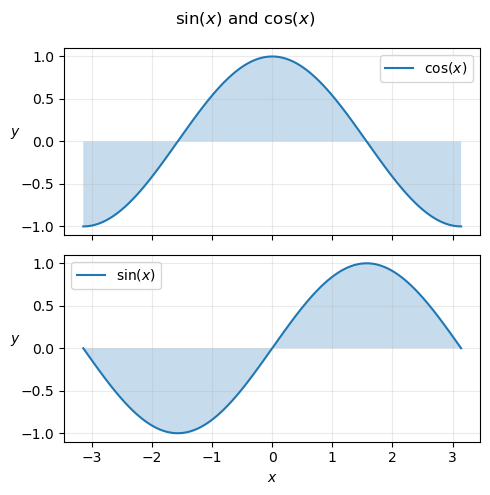

In [14]:
# sets up the axes and figure
# gets 2 axes ready to plot in 2 rows in 1 column
# Change the size of the figure by specifying a figure size (figsize).
# Ask that the plots share the x-axis using sharex
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5), # figsize(x-length, y-length)
                       sharex=True)

# Since ax is a NumPy array with two axes, we can index them using 0 and 1. Then we just plot to that axis.
# Use fill_between() to fill the plots.
ax[0].plot(x, cos_x, label=r'$\cos(x)$') # need to put r before the label or python will read \c as an escape sequence
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

# Draw the legends
#   a more sensible way to do this is with a for loop that 
#   iterates through the items in ax 
for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

# sharing the x-axis. So, we only need to label the lowest plot. This has the index 1.
ax[1].set_xlabel('$x$')

# adds supertitle to figure
fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

# ask Matplotlib to make any necessary adjustments to the layout to make our plot look nice by calling tight_layout()
fig.tight_layout()

# It automatically adjusts the spacing between subplots and the padding around the figure's border.
# It analyzes the extents of various elements within the subplots (like tick labels, axis labels, and titles) to determine the optimal spacing.

# 5 Multiple rows and columns

- top left
- top right
- bottom left
- bottom right

### Using ax

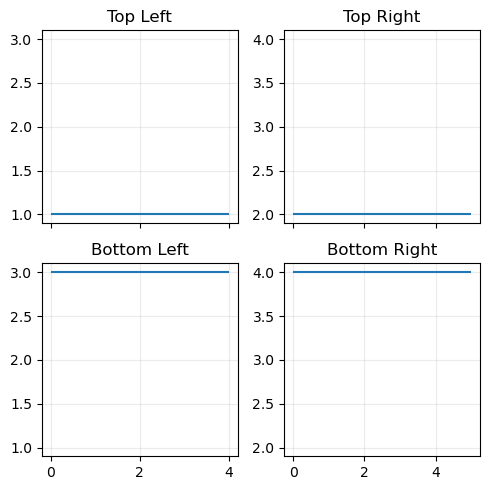

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

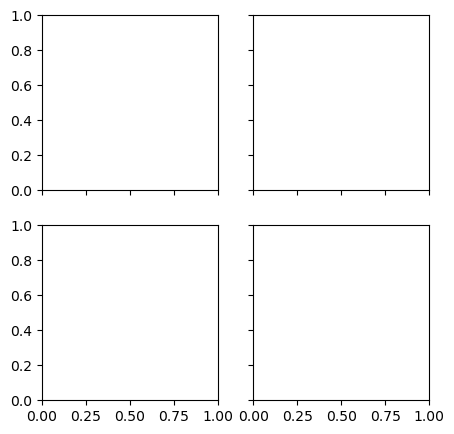

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')

In [17]:
# How is ax structured
ax.shape

(2, 2)

So ax is organised as a 2 x 2 array. 

In [ ]:
# accessing each axes
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

In [19]:
# assigna a variable name for easier access
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [20]:
# Alternatively, 
top_left, top_right, bottom_left, bottom_right = ax.flatten()
#flatten() takes the 2D array and ‘flattens’ it into a 1D array; unpacking takes care of the assignments.

## 5.1 Sharing axes

Notice that Matplotlib was asked to make the plots more compact by sharing the $x$ and $y$ axes using sharex and sharey.

Let’s first see what happens if we do not specify how to share.



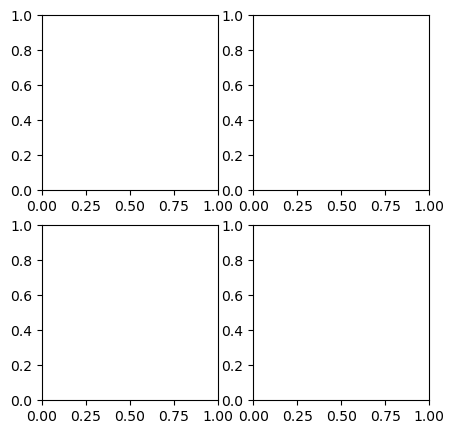

In [21]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)

Matplotlib has auto-scaled both axes

### Ways to share axes:
|Option|Result|
|:--|:--|
|True|Makes all the axes using the same range|
|col|Use the same range for all the column|
|row|Use the same range for all the rows|

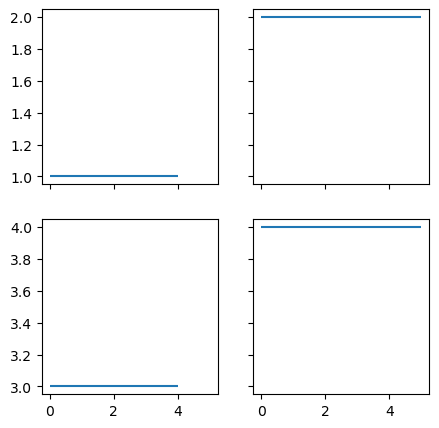

In [ ]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row' # all plots have the same range for the x-axis
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

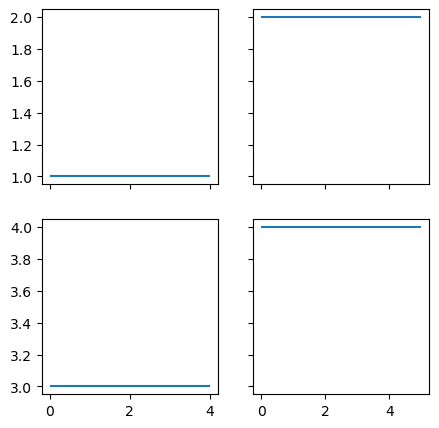

In [ ]:
# sharex = 'col' is more appropriate for this 
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row' # columns share the same axis while rows share the same axis
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.2 Accessing all axes

You will often want to apply changes to all the axes, like in the case of the grid. You can do this by:

In [ ]:
# this is inefficient
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

In [28]:
# for loop is more efficient
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

A histogram is a valuable tool for showing distributions of data

### Data

### A quick helper function

You will need to read the data from these files several times. So, you can create a function called det_plot_data() that you can call. You must examine the file structure to understand the data and the first line is skipped.

In [ ]:
def get_plot_data():
    data = {} # dictionary
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1) # creates key called 'ALL' and assigns all these data to it

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1) # creates key called 'NUS' and assigns all these data to it

    return data
# get_plot_data() returns a dictionary {'All':[array], 'NUS':[array]}

### The histogram

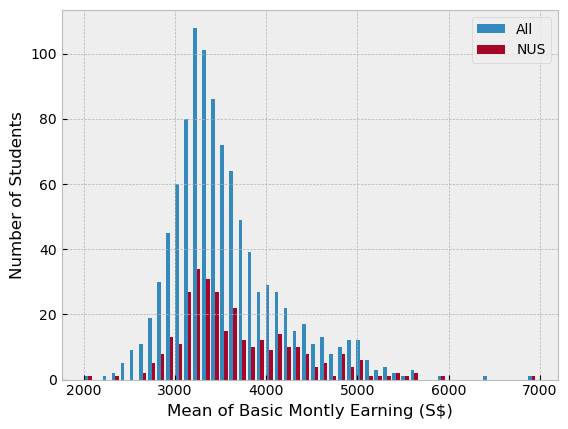

In [32]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

Scatter plots are created by putting a marker at an $(x, y)$ point you specify. They are simple yet powerful.

[3701. 2850. 3053. ... 3856. 3303. 3245.]
[2741. 3057. 3098. 2960. 3404. 2740. 3065. 3350. 3933. 3277. 3266. 4106.
 3007. 2961. 2839. 2823. 3245. 3140. 3592. 3286. 2940. 3153. 3330. 3036.
 3155. 4922. 4406. 2687. 2896. 2850. 2726. 3101. 3473. 2719. 3141. 3192.
 3234. 3979. 2836. 3350. 3107. 3729. 3183. 3684. 4054. 4290. 2600. 3089.
 2931. 2966. 3277. 3212. 3674. 3306. 3375. 3250. 3591. 3054. 3160. 5027.
 4404. 2976. 3123. 2760. 2804. 3224. 3467. 2839. 3266. 3317. 3164. 4173.
 2817. 3547. 3230. 3847. 3255. 3597. 4053. 4054. 2907. 2989. 3146. 3256.
 3400. 3300. 4119. 3452. 3768. 3318. 3624. 3121. 3279. 4866. 4352. 3175.
 3219. 3244. 3203. 2859. 3245. 3431. 3400. 2971. 3258. 3341. 4173. 3314.
 3414. 3402. 3884. 3669. 3549. 3432. 3788. 3381. 3470. 4844. 2905. 2895.
 3331. 3500. 3232. 4126. 2977. 3435. 4320. 3875. 3926. 3282. 3035. 3247.
 4460. 3166. 3308. 3250. 3347. 3005. 3309. 3365. 4124. 3215. 3550. 3361.
 3529. 3783. 3425. 3905. 3269. 3537. 4958. 3186. 3053. 3340. 3473. 3770.
 4272. 33

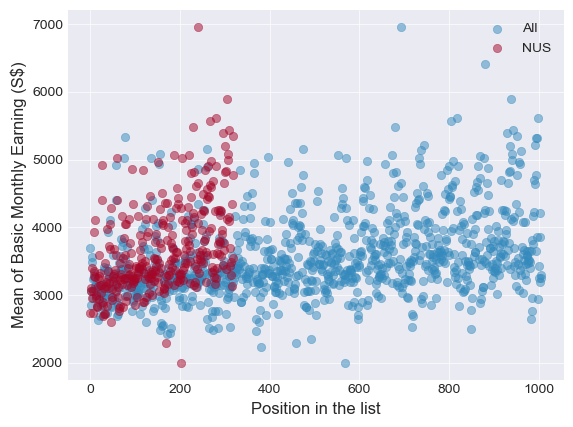

In [36]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    print(numbers)
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Monthly Earning (S$)')
plt.legend()


## 6.3 Bar charts

extract the data and typecast to pass two lists to bar(). Use barh() if you want horizontal bars.

Text(0, 0.5, 'Number of Students')

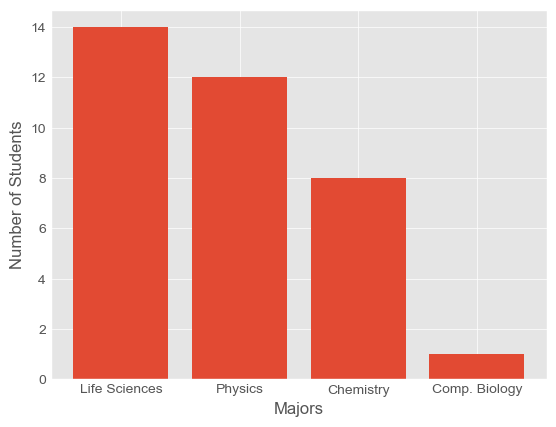

In [37]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

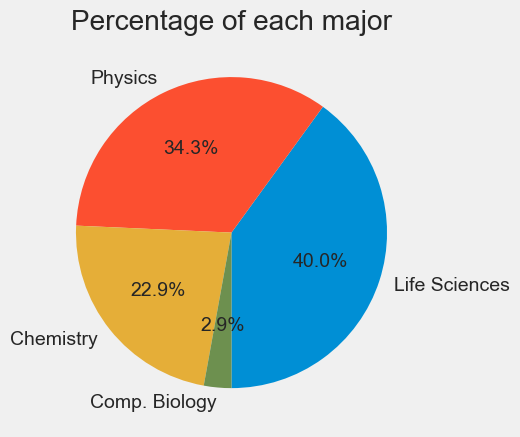

In [42]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90               
        )
plt.title('Percentage of each major')